In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True)

In [7]:
def generate_samples(N = 20):
    
    """
    ------------------------------------
    Description :
    Purpose of this function is to generate random data given a set of number
    of samples to draw points from.
    
    Arguments :
    N -- a python integer representing number of samples (default=20)
    
    Return :
    X -- a numpy nd-array representing x-axis values
    Y -- a numpy nd-array representing y-axis values
    --------------------------------------
    
    """
    
    # generate random data on the x-axis with +5, -5 noise
    
    X = np.random.random(N) * 10 - 5 
    
    # generate random data on y-axis with gaussian noise
    
    Y = 0.5 * X - 1 + np.random.randn(N)
    
    return X, Y

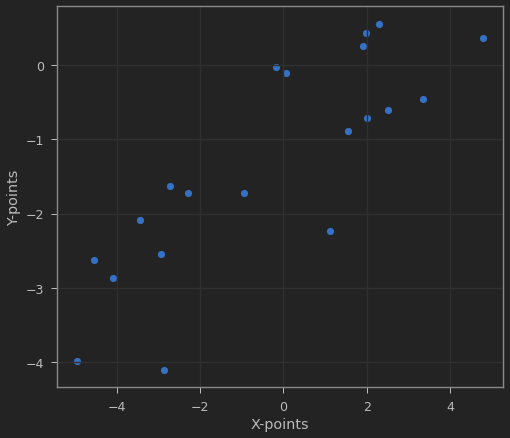

In [8]:
X, Y = generate_samples(N=20)

plt.scatter(X, Y)
plt.xlabel("X-points")
plt.ylabel("Y-points")
plt.show()

In [11]:
# PyTorch stuffs

# Step 1 : Define the model

model = nn.Linear(1, 1)


# Step 2 : Define the Loss function and the optimizers

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Step 3 : Reshape your data and load it as torch tensor
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))



In [12]:
# Train the model

epochs = 30
losses = []

for epoch in range(epochs):
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    
    # track the losses
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    print("Epoch : {}/{} , Loss : {:.4f}".format(epoch, epochs, loss.item()))
    
    

Epoch : 0/30 , Loss : 9.4556
Epoch : 1/30 , Loss : 6.7994
Epoch : 2/30 , Loss : 4.9469
Epoch : 3/30 , Loss : 3.6548
Epoch : 4/30 , Loss : 2.7534
Epoch : 5/30 , Loss : 2.1243
Epoch : 6/30 , Loss : 1.6850
Epoch : 7/30 , Loss : 1.3782
Epoch : 8/30 , Loss : 1.1637
Epoch : 9/30 , Loss : 1.0136
Epoch : 10/30 , Loss : 0.9084
Epoch : 11/30 , Loss : 0.8345
Epoch : 12/30 , Loss : 0.7825
Epoch : 13/30 , Loss : 0.7457
Epoch : 14/30 , Loss : 0.7196
Epoch : 15/30 , Loss : 0.7010
Epoch : 16/30 , Loss : 0.6875
Epoch : 17/30 , Loss : 0.6777
Epoch : 18/30 , Loss : 0.6705
Epoch : 19/30 , Loss : 0.6651
Epoch : 20/30 , Loss : 0.6609
Epoch : 21/30 , Loss : 0.6576
Epoch : 22/30 , Loss : 0.6550
Epoch : 23/30 , Loss : 0.6528
Epoch : 24/30 , Loss : 0.6510
Epoch : 25/30 , Loss : 0.6494
Epoch : 26/30 , Loss : 0.6480
Epoch : 27/30 , Loss : 0.6467
Epoch : 28/30 , Loss : 0.6456
Epoch : 29/30 , Loss : 0.6445


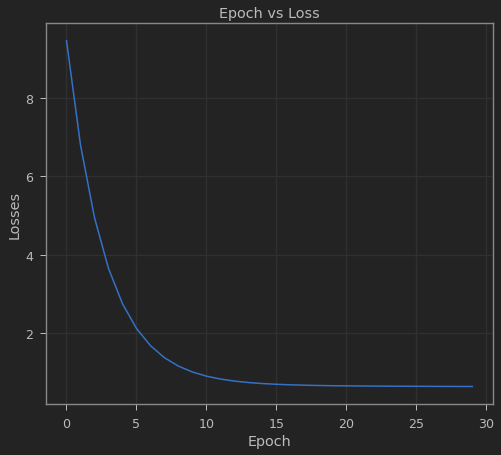

In [13]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.title("Epoch vs Loss")
plt.show()

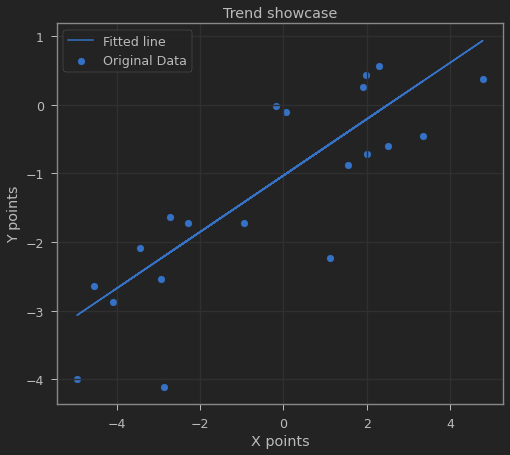

In [15]:
# predict using the trained model

predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Original Data")
plt.xlabel("X points")
plt.ylabel("Y points")
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.title("Trend showcase")
plt.show()

In [16]:
# Inspect the parameters of the model
# To check how close they are to the true values
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w, b)

[[0.41113213]] [-1.0318803]
